# Проект "Принятие решений в бизнесе на основе данных"

## Описание задачи от заказчика

Необходимо сформировать рекомендации отделу маркетинга для увеличения выручки интернет-магазина. 

Цели расследования:
- провести приоретизацию гипотез
- проанализировать результаты проведенного теста

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import math
import __main__
from scipy import stats as st
import numpy as np
import seaborn as sns
import datetime as dt



### Импорт данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

print(hypothesis.info())
print(hypothesis.columns)

print(orders.info())
print(orders.columns)

print(visitors.info())
print(visitors.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitor

Необходимо привести названия таблицы  "hypothesis" к нижнему регистру. Также в таблицах "orders" и "visitors" необходимо привести столбец "date" к типу datetime для дальнейших вычислений.


In [3]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])


## Приоретизация гипотез

Посчитаем коэффициент ICE для гипотез и отсортируем в порядке убывания.

In [4]:
pd.set_option('display.max_colwidth', -1)
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/ hypothesis['efforts']
display(hypothesis[['hypothesis','ICE']].sort_values('ICE',ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


ТОП-3 самых перспективных гипотез по коэффициенту ICE это гипотезы под номерами: 8,7,0

In [5]:
pd.set_option('display.max_colwidth', -1)
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/ hypothesis['efforts']
display(hypothesis[['hypothesis','RICE']].sort_values('RICE',ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


ТОП-3 самых перспективных гипотез по коэффициенту ICE это гипотезы под номерами: 2,7,0

### Вывод

Результаты полученные методом RICE отличаются от результатов полученных методом ICE, т.к. в случае метода RICE мы учитываем также охват изменений. Очевидно, что акция со скидкой в день рождения затрагивает сильно меньше пользователей (гипотеза №8), чем количество пользователей основных страниц, которые увидят форму подписки на email-рассылку (гипотеза №7), поэтому для метода RICE гипотеза №8 опустилась на 5-е место. Гипотезы под номерами "0", "7" для метода RICE также остались в ТОП-3, а гипотеза №7 стала самой перспективной.

Гипотеза №4 независимо от метода оказалось самой неперспективной, вероятно это связано с тем, что цвет фона, на первый вгляд, мало повлияет на вовлеченность пользователей, а также уверенность в конкретном влиянии цвета фона на вовлеченность небольшая.

Гипотеза №2 после использования метода RICE оказалась на 2 месте. На это также напрямую повлиял охват. 

При принятии решения о приоритетах гипотез рекомендуется использовать метод RICE, т.к. в нем учитывается при подсчете приоритета очень важный показатель - охват.

## Анализ A/B теста 

Для начала посмотрим сколько длился тест.

In [6]:
display(visitors['date'].head(31))

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
5    2019-08-06
6    2019-08-07
7    2019-08-08
8    2019-08-09
9    2019-08-10
10   2019-08-11
11   2019-08-12
12   2019-08-13
13   2019-08-14
14   2019-08-15
15   2019-08-16
16   2019-08-17
17   2019-08-18
18   2019-08-19
19   2019-08-20
20   2019-08-21
21   2019-08-22
22   2019-08-23
23   2019-08-24
24   2019-08-25
25   2019-08-26
26   2019-08-27
27   2019-08-28
28   2019-08-29
29   2019-08-30
30   2019-08-31
Name: date, dtype: datetime64[ns]

Тест проводился в течение 1 месяца - с 01.08.2019 до 31.08.2019.

Найдем кумулятивную выручуку для групп и построим график. Для этого сначала агрегируем необходимые данные.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


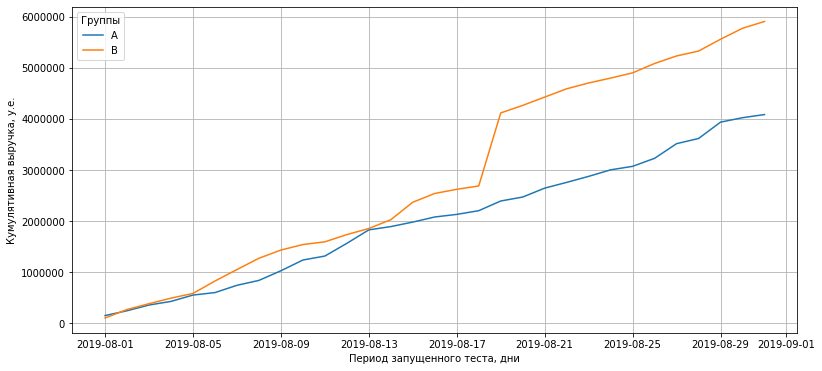

In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# кумулятивная выручка по заказам
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'
    }), axis=1)\
    .sort_values(by=['date','group']
)

# кумулятивное число посетителей
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'
    }), axis=1)\
    .sort_values(by=['date','group']
)

# объединим таблицы методом с параметром outer для того, что бы все значения попали в итоговый датафрейм
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'],how = 'outer')
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#разделим данные по группам в отдельные датафреймы 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки для групп
plt.figure(figsize=(13, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend(title='Группы')
plt.xlabel('Период запущенного теста, дни')
plt.grid(True)
plt.ylabel('Кумулятивная выручка, у.е.')
plt.show()

Из графика видно, что группа B стабильно имеет большую выручку на протяжении всего эксперимента. Особенно это становится заметно 19.08.2019: Либо в этот день случилась какая-то крупная покупка пользователем из группы B либо с этого момента стало значительно больше заказов от пользователей группы B. Для проверки посмотрим на график изменения кумулятивного среднего чека. Также далее необходимо будет изучить данные на предмет выбросов.

Важно отметить - выручка для обеих групп растет на протяжении всего теста. 

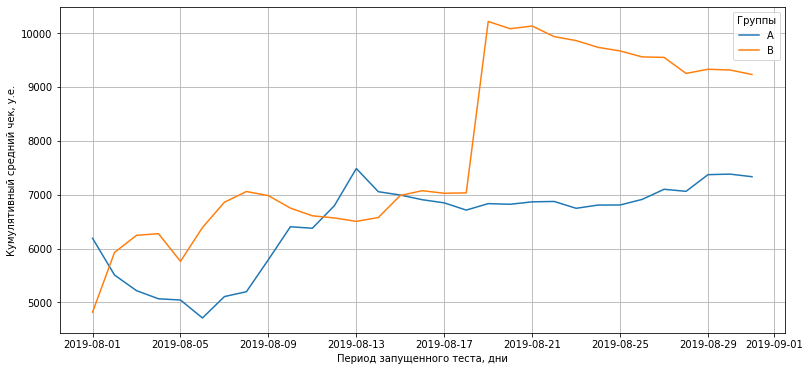

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
940,2420050534,4003628586,2019-08-08,58550,B


In [8]:
plt.figure(figsize=(13, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(title='Группы')
plt.xlabel('Период запущенного теста, дни')
plt.grid(True)
plt.ylabel('Кумулятивный средний чек, у.е.')
plt.show()

display(orders[orders['group'] == 'B'].sort_values('revenue',ascending = False).head(5))

Из графика видно, что действительно 19.08.2019 была совершена одна очень крупная покупка пользователем группы B. Далее  средний чек группы B плавно снижается.  

До 19.08.2019 прослеживается тренд на повышение среднего чека для обеих групп, однако данных слишком мало, что бы охарактеризовать поведение среднего чека на более длительный период. 

Из-за большого разброса из этого графика сложно выделить поведение среднего чека в разрезе групп, поэтому посмотрим на график относительного изменения кумулятивного среднего чека. 

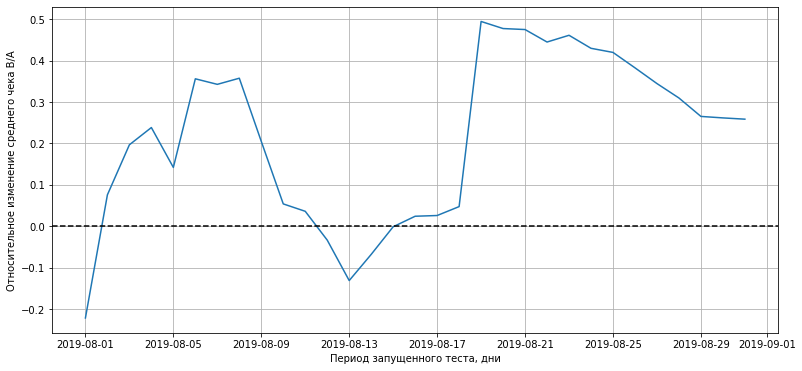

,transactionId,visitorId,date,revenue,group
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A


In [9]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Период запущенного теста, дни')
plt.grid(True)
plt.ylabel('Относительное изменение среднего чека B/A')
plt.show()

display(orders[orders['group'] == 'A'].sort_values('revenue',ascending = False).head(5))

Из графика видно, что средний чек практически всегда выше у группы B. Однако видно, что в период с 08.08.2019 до 13.08.2019 средний чек группы А рос и даже был выше среднего чека группы B четыре дня (10.08 - 14.08). 
Также из графика видно, что в данных много выбросов и необходимо оценить метрики на очищенных от выбросов данных.

Посмотрим на кумулятивную конверсию групп. 

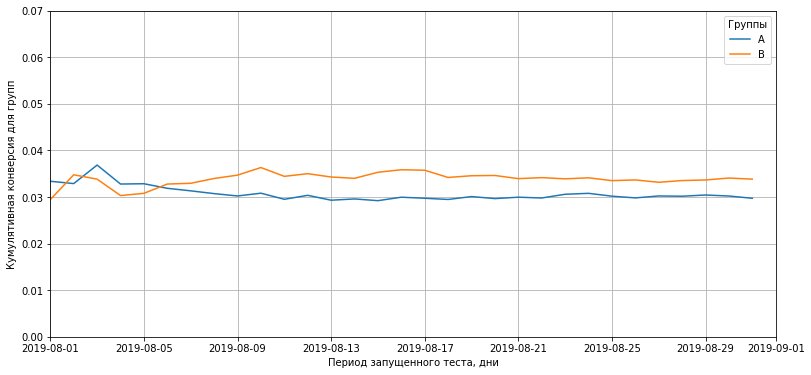

In [10]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.figure(figsize=(13, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(title='Группы')
plt.xlabel('Период запущенного теста, дни')
plt.grid(True)
plt.ylabel('Кумулятивная конверсия для групп')
plt.axis(["2019-08-01", '2019-09-01', 0, 0.07]) 
plt.show()

Из графика видно, что конверсия группы B с 10.08.2019 стабильно выше до самого конца теста. 
Посмотрим относительное изменение конверсии для групп.  

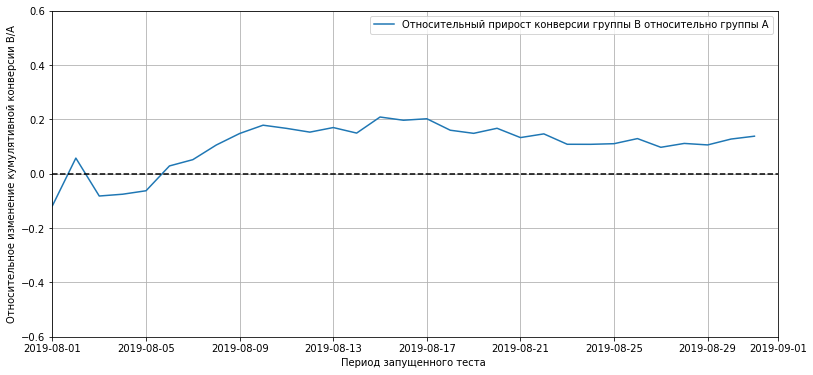

In [11]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
plt.xlabel('Период запущенного теста ')
plt.grid(True)
plt.ylabel('Относительное изменение кумулятивной конверсии B/A')
plt.show()

График подтверждает, что конверсия группы B стабилизируется после 10.08.2019 и стабильно выше конверсии группы A.

Ранее из графиков было видно, что есть выбросы в выручке и среднем чеке. Для оценки количества выбросов сначала изучим точечный график количества заказов по пользователям и посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

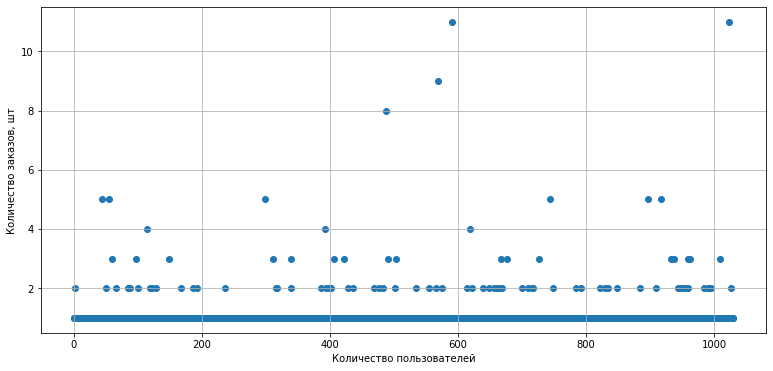

95 и 99 перцентиль соответсвенно: [2. 4.]


In [12]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(13, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество пользователей')
plt.grid(True)
plt.ylabel('Количество заказов, шт')
plt.show()

print('95 и 99 перцентиль соответсвенно:',np.percentile(ordersByUsers['orders'], [95, 99]))

Из графика и значений 95-й и 99-й перцентилей видно, что наибольшее количество пользователей совершило не более 2-х заказов за период теста, поэтому аномальными будем считать тех пользователей, которые сделали более **2 заказов**

Теперь изучим точечный график стоимости заказов и также вычислим 95 и 99 перцентили. Для наглядности выведем два графика с разными диапазонами на оси y.

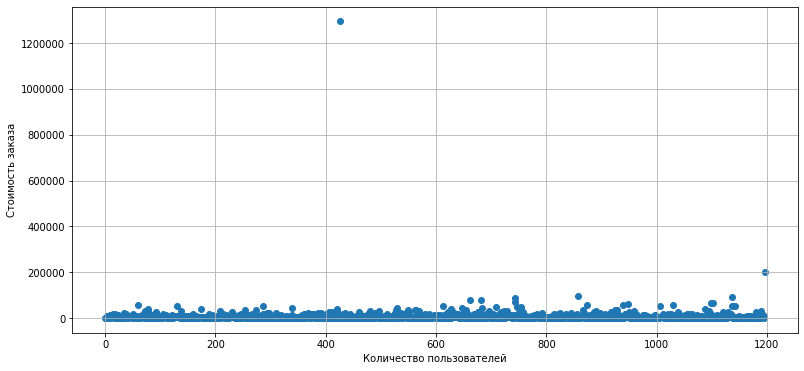

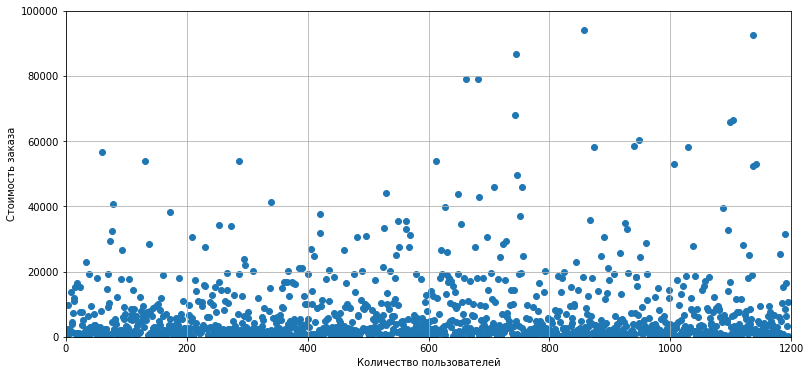

95 и 99 перцентиль соответсвенно: [28000.  58233.2]


In [13]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(13, 6))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.grid(True)
plt.ylabel('Стоимость заказа')
plt.show()
plt.figure(figsize=(13, 6))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.grid(True)
plt.ylabel('Стоимость заказа')
plt.axis([0,1200, 0, 100000])
plt.show()
print('95 и 99 перцентиль соответсвенно:',np.percentile(orders['revenue'], [95, 99])) 

Из графиков, а также из значений 95 и 99 перцентилей видно, что большинство пользователей делают заказ на сумму не более 35 000 у.е., поэтому аномальными будем считать тех пользователей, которые сделали заказы на сумму более **35 000 у.е.**

Далее проверим на значимость выявленные ранее различия в среднем чеке и конверсии между группами сначала на сырых, а потом на  очищенных данных. 
Т.к.,судя по выбросам и значениям, данные не распределены нормально (во всех метриках есть тяжелый хвост), поэтому проверять значимость будем с помощью теста Манна-Уитни.

Подготовим данные для использования выбранного теста - разделим пользователей на группы и создадим массив, который содержит индекс (ранг) значения и само значение (кол-во заказов пользователя под соответствующим индексом). Также создадим датафреймы, очищенные от выбросов. 

In [14]:
display(cumulativeData)

display(orders)
display(visitors)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

normal_orders_num = 2
normal_order_values = 35000


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > normal_orders_num]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > normal_orders_num]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > normal_order_values]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


Данные готовы, можно переходить к проверке значимости. Критический уровень статистической значимости возьмем за 0,05. Т.к. в данном проекте не стоит конкретной задачи проверить что конверсия или чек одной конкретной группы больше другой, то тест будем проводить двусторонний.

Для проверки разницы конверсий между группами сформируем гипотезы:

H0: Средние значения конверсии группы B равны средним значениям конверсии группы A (разница в средних значениях конверсии статистически не значима)

H1: Средние значения конверсии группы B не равны средним значениям конверсии группы А (разница в средних значениях конверсии статистически значима)

In [16]:
alpha = 0.05



results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: {0:.5f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

    
print("Относительная разница конверсии группы B к группе A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение: 0.00840
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница конверсии группы B к группе A: 0.138


Результаты теста говорят о том, что  разница в конверсии между группами статистически значима (Вероятность случайно получить точно такое же различие или больше в конверсиях групп не более 5%).

**Для исходных данных конверсия группы B статистически значимо больше конверсии группы А на 13,8%** 

Далее проверим на значимость разницу в средних чеках групп. Формируем гипотезы:

H0: Средние значения среднего чека группы B равен средним значениям среднего чека группы A (разница статистически не значима)

H1: Средние значения среднего чека группы B не равен средним значениям среднего чека группы А (разница статистически значима)

In [17]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: {0:.5f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


print('Относительная разница среднего чека группы B к группе A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-значение: 0.36465
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница среднего чека группы B к группе A: 0.259


Несмотря на большую относительную разницу средних чеков групп (средний чек группы B больше на 25,9% среднего чека группы А) утверждать о значимой разнице нельзя: огромная вероятность случайно получить точно такое же различие или больше (~36,5%).

**Для исходных данных нельзя утверждать о значимой разности среднего чека между группами.**

Проверим статистическую значимость разницы конверсий между группами на очищенных данных. Используем те же гипотезы, что и для исходных данных:

H0: Средние значения конверсии группы B равны средним значениям конверсии группы A (разница в средних значениях конверсии статистически не значима)

H1: Средние значения конверсии группы B не равны средним значениям конверсии группы А (разница в средних значениях конверсии статистически значима)

In [18]:
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: {0:.5f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

    
print("Относительная разница конверсии группы B к группе A: {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))


p-значение: 0.00502
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница конверсии группы B к группе A: 0.179


После очистки данных от выбросов, результат теста не изменился: разница в конверсии между группами статистически значима. 
Относительная разница конверсии группы B к группе А увеличилась с 13,8% до 17,9% после очистки данных от выбросов.

**Для очищенных данных конверсия группы B статистически значимо больше конверсии группы А на 17,9%** 

Осталось проверить статистическую значимость разницы среднего чека между группами на очищенных данных. Используем те же гипотезы, что и для исходных данных:

H0: Средние значения среднего чека группы B равен средним значениям среднего чека группы A (разница статистически не значима)

H1: Средние значения среднего чека группы B не равен средним значениям среднего чека группы А (разница статистически значима)

In [19]:
results = st.mannwhitneyu(\
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-значение: {0:.5f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


print('Относительная разница среднего чека группы B к группе A: {0:.3f}'.format(
    orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)




p-значение: 0.44238
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница среднего чека группы B к группе A: 0.022


После очистки данных вероятность случайно получить точно такое же различие или больше в среднем чеке между группами увеличилось с ~36,5% до ~44,3%. 
Относительная разница среднего чека между группой B и группой A сильно уменьшилась  с 25,9%  до 2,2% (средний чек группы B все также больше).

**Для очищенных данных нельзя утверждать о значимой разности среднего чека между группами.**

### Вывод

В результате анализа результатов A/B теста получили следующие выводы:

- Есть статистически значимое различие по конверсии между группами по исходным и очищенным от выбросов данным: конверсия группы B больше конверсии группы А на 13,8% или 17,9% для исходных или очищенных от выбросов данных соответсвенно.

- По исходным и очищенным от выбросов данным нет статистически значимого различия по среднему чеку между группами.

- График различия конверсии между группами показывает, что результаты группы B лучше группы A: значение зафиксировалось около среднего значения ~0,034 против ~0,03.

- График различия среднего чека и расчеты показывают, что средний чек группы B больше, чем средний чек группы А. Однако в данных много выбросов, а эта разница в среднем чеке между группами статистически незначима, поэтому сделать каких-либо конкретных выводов относительно среднего чека нельзя.  


**На основе перечисленных выводов принимаем решение о прекращении теста и фиксации победы группы B.**  

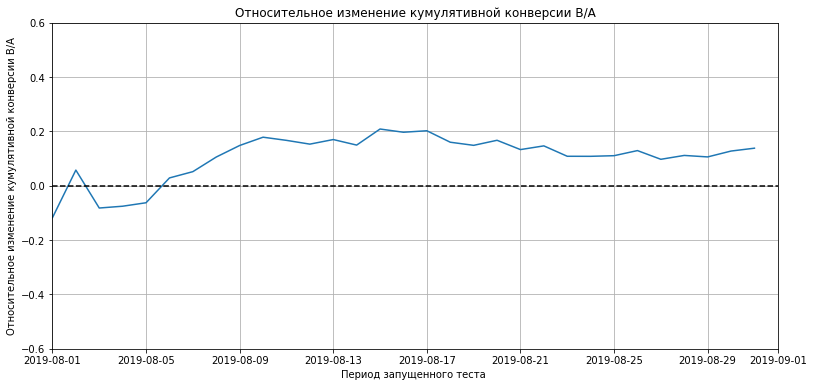

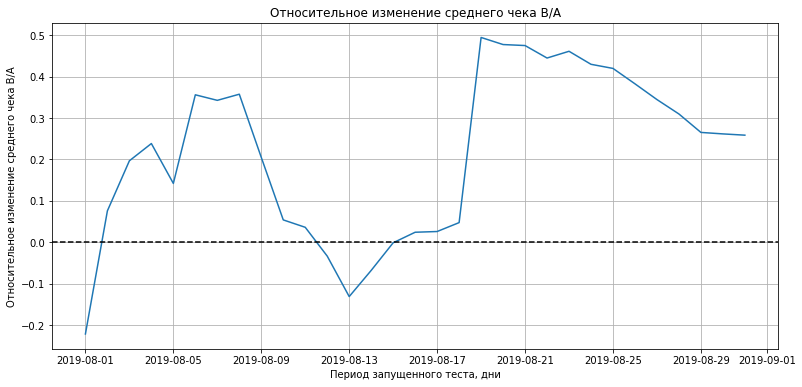

In [20]:
plt.figure(figsize=(13, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивной конверсии B/A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
plt.xlabel('Период запущенного теста ')
plt.grid(True)
plt.ylabel('Относительное изменение кумулятивной конверсии B/A')
plt.show()

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение среднего чека B/A')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Период запущенного теста, дни')
plt.grid(True)
plt.ylabel('Относительное изменение среднего чека B/A')
plt.show()


## Итоговый вывод

Для метода приоритезации гипотез ICE ТОП3:

- Запустить акцию, дающую скидку на товар в день рождения (номер 8)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (номер 0)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (номер 7)
	

Для метода RICE ТОП3:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (номер 7)
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (номер 2)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (номер 0)

Гипотеза "изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"(номер 4) независимо от метода оказалось самой неперспективной.

При принятии решения о приоритетах гипотез рекомендуется использовать метод RICE, т.к. в нем учитывается при подсчете приоритета очень важный показатель - охват.


В результате анализа результатов A/B теста получили следующие выводы:

- Есть статистически значимое различие по конверсии между группами по исходным и очищенным от выбросов данным: конверсия группы B больше конверсии группы А на 13,8% или 17,9% для исходных или очищенных от выбросов данных соответсвенно.

- По исходным и очищенным от выбросов данным нет статистически значимого различия по среднему чеку между группами.

- График различия конверсии между группами показывает, что результаты группы B лучше группы A: значение зафиксировалось около среднего значения ~0,034 против ~0,03.

- График различия среднего чека и расчеты показывают, что средний чек группы B больше, чем средний чек группы А. Однако в данных много выбросов, а эта разница в среднем чеке между группами статистически незначима, поэтому сделать каких-либо конкретных выводов относительно среднего чека нельзя.  


**На основе проведенного A/B теста принимаем решение о прекращении теста и фиксации победы группы B.**  